# Project Title:Prediction of  Passenger's  Survival chances In Titanic Ship Disaster



# Content Of The Project

    1. Problem Statement
    2. Collection of the dataset
    3. Data Exploration Analysis
    4. Feature Engineering 
    5. Feature Selecton
    6. Building the Model
    7. Testing the Model
    8. Reference

# 1. Problem Statement

We will be working with a dataset which contains the informations about the passengers involved in the popular Titanic Disaster.we are to draw insight from the train dataset, and through that, we will build a Machine Learning model that will predict the chances of survival of each passenger in the Ship using the test dataset

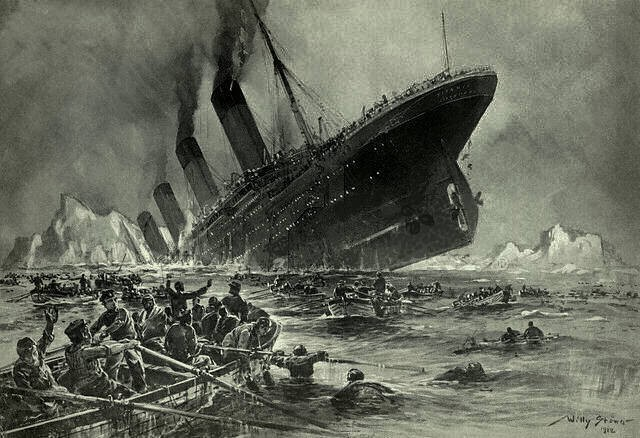

In [1]:
# importing the imagine of the ship
from IPython.display import Image
Image("titanic.jpeg")

# 2. Collection of the dataset

 Both the train and the test dataset were gotten from the kaggle website

.

# Loading of the dataset


In [2]:
# Importing The Basic libraries and setting the display 

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option("display.max_rows", 150)
pd.set_option("display.max_columns", None)
pd.set_option("display.width", None)
pd.set_option("display.max_colwidth", None)

%matplotlib inline

In [3]:
# Importing the dataset using pandas

train_df = pd.read_csv('train.csv')
test_df = pd.read_csv("test.csv")

.

# 3. Data Exploration Analysis

- Data exploration is an approach similar to initial data analysis, whereby a data analyst uses visual exploration and statiscal method to understand what is in a dataset and the characteristics of the data, rather than through traditional data management systems

# 3.1 Dataset Dictionary

PassengeId: numerical indentity of each passenger

Survived: 1 = Survived and 0 = not Survived

Pclass: 1 = 1st Class Ticket, 2 = 2nd Class Ticket and 3 = 3rd Class Ticket

Name: Name of each Passenger

Sex : Gender of each Passenger

Age : Age of of each Passenger

SibSp: Number of sbling of of each Passenger

Parch: Number of Parent of of each Passenger

Ticket: Ticket type

Fare : Cost of obtaining the Ticket

Cabin: Cabin Number

embarked Port of Embarkation C = Cherbourg, Q = Queenstown, S = Southampton


In [4]:
# printing the first 5 row of the train dataset
test_df1 = test_df.copy()
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
# printing the last 5 row of the train dataset

train_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [6]:
# show the shape of the tain dataset
train_df.shape

(891, 12)

In [7]:
# show the shape of the test dataset
test_df.shape


(418, 11)

In [8]:
# show the columns of the test dataset
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [9]:
# show the summary of the train dataset
train_df.info(), print("__"* 50),test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
____________________________________________________________________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtyp

(None, None, None)

In [12]:
# define a function for missing_values
def missingdata(data):
    total = data.isnull().sum().sort_values(ascending = False)
    percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
    missing_values=pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    missing_values= missing_values[missing_values["Percent"] > 0]
    f,ax =plt.subplots(figsize=(8,6))
    plt.xticks(rotation='90')
    fig=sns.barplot(x=missing_values.index,y= missing_values["Percent"],color="red",alpha=0.8)
    plt.xlabel('Features', fontsize=15)
    plt.ylabel('Percent of missing values', fontsize=15)
    plt.title('Percent missing data by feature', fontsize=15)
    return missing_values

,Total,Percent
Cabin,687,77.104377
Age,177,19.865320
Embarked,2,0.224467


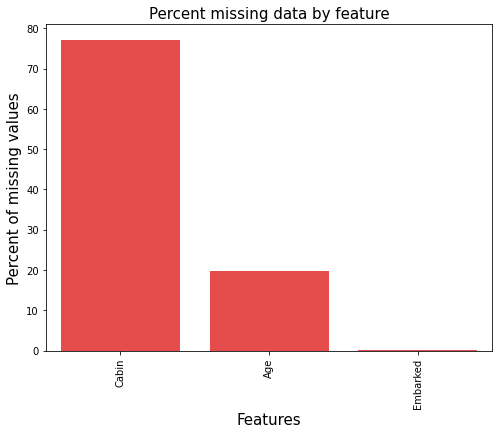

In [13]:
# identifying missing_value in train_df
missingdata(train_df)

,Total,Percent
Cabin,327,78.229665
Age,86,20.574163
Fare,1,0.239234


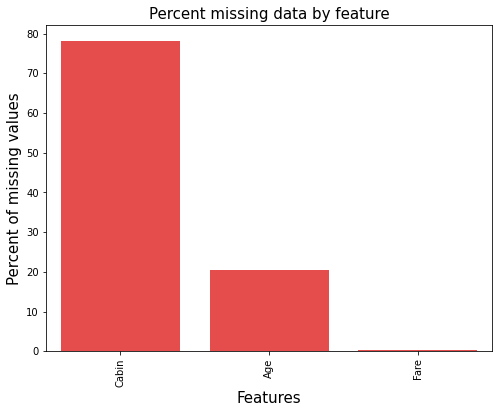

In [14]:
# identifying missing_value in test_df
missingdata(test_df)

In Cabin column we have total number of 687 missing values which resulted to 77.1%, Age column contain total number of 177 missing values which resulted to 19.87%, Embarked column contain total number of 2 missing values which resulted to 0.22%, The remaining columns has No missing values

.

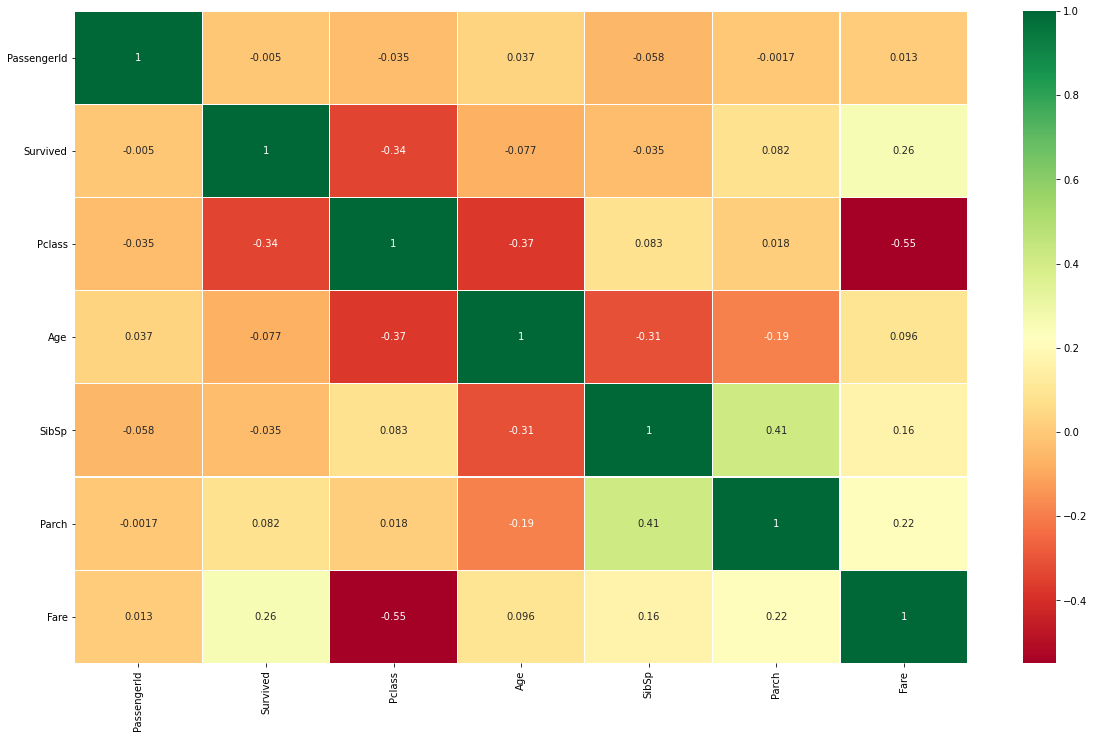

In [15]:
# finding the correlation between the train dataset
cor = train_df.corr()
sns.heatmap(cor,annot=True,cmap='RdYlGn',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(20,12)
plt.show()

As we can see from the above result, Parch and SibSp has the higher correlation. and this make sense as Parent likely to travel with thier children or Spouses

.

# Visualizing each information in train dataset

Here, I will segregate the columns in the dataset into numerical and category features.

In [16]:
train_df_cat =train_df.loc[:, ["Survived", "Pclass", "Sex","Ticket", "Cabin", "Embarked"]]
train_df_num = train_df.loc[:, ["Age","SibSp", "Fare","Parch"]]

# Univaraite Analysis for numerical distribution

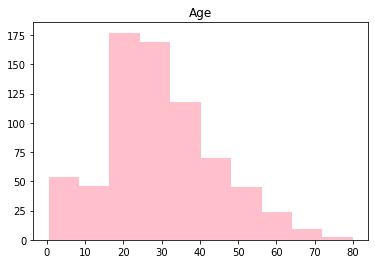

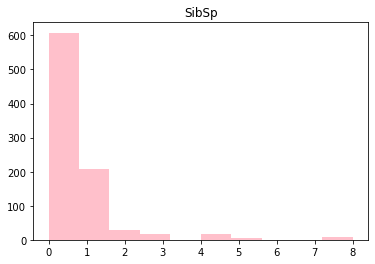

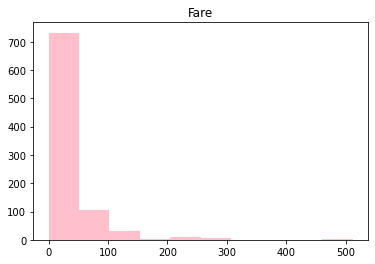

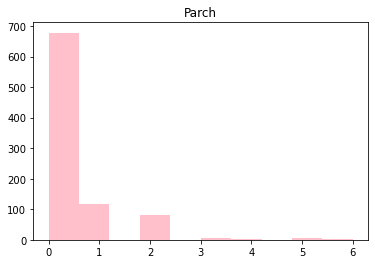

In [17]:
# define a  function for ploting numerical univariate analysis
for dataset in train_df_num:
    plt.hist(train_df_num[dataset], color="pink")
    plt.title(dataset)
    plt.show()

As it can be seen from above result, Most of the distribution are scatter except for the age  column which is normalize.

# Univaraite Analysis for categorical distribution

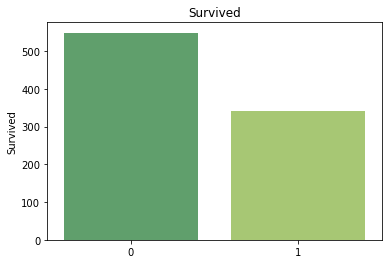

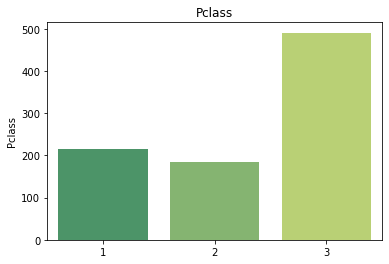

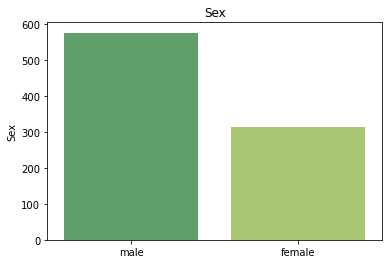

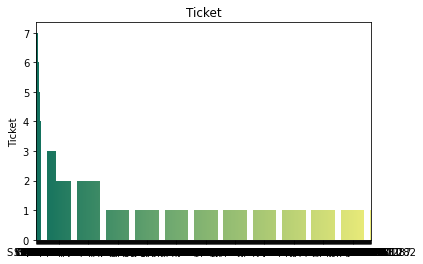

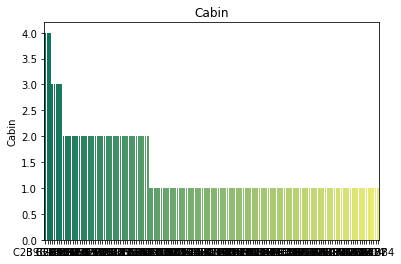

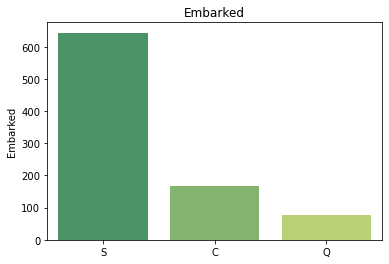

In [18]:
# visualizing the category aspect of the features

for element in train_df_cat.columns:
    sns.barplot(x=train_df_cat[element].value_counts().index, palette="summer",y=train_df_cat[element].value_counts() ).set_title(element)
    plt.show()

# The plot above shows that:
    1. majority of the Passengers die in the ship
    
    2. we have vast number of people in 3rd class than people in 1st and 2nd class has least number of Passengers
    
    3. Most of the passengers were Male
    
    4. Most of the passengers boarded the ship from Southamson
    
the ticket and the cabin columns has no meaning from the plot

In [19]:
# visualizing the numerical aspect of the features in pivot table
pd.pivot_table(data=train_df, index= "Survived", values=train_df_num, aggfunc="mean")

,Age,Fare,Parch,SibSp
Survived,,,,
0,30.626179,22.117887,0.329690,0.553734
1,28.343690,48.395408,0.464912,0.473684


# The above result show that:

    1. The average Age of people that Survived is 28 years old
    
    2. People that pay high Fare rate (Rich People) Survived most
    
    3. people that has parent are also likely to survived. this make sense as parent will tend to safe their children
    
    4. people that has sibling are likely not to survived, this can be seen as such people will be trying to find and save their relative

# Bi.variance Analysis

In [20]:
# showing the survival rate between the gender
def barplot(x):
    sns.barplot(data=train_df, x=x, y="Survived")
    plt.show()
    
#  defined a function of pivot_table for the distribution
def pivot_table(column):
    result=pd.pivot_table(data=train_df, index= "Survived", columns=list(column), values="Ticket",aggfunc="count")
    return result


# function for barplot
def bar_chart(feature):
    survived= train_df[train_df["Survived"]==1][feature].value_counts()
    dead= train_df[train_df["Survived"]==0][feature].value_counts()
    df = pd.DataFrame([survived, dead], index= ["survived", "dead"])
    df.plot(kind="bar", stacked=True, figsize=(10,5))
    


None


Sex,female,male
Survived,,
0,81,468
1,233,109


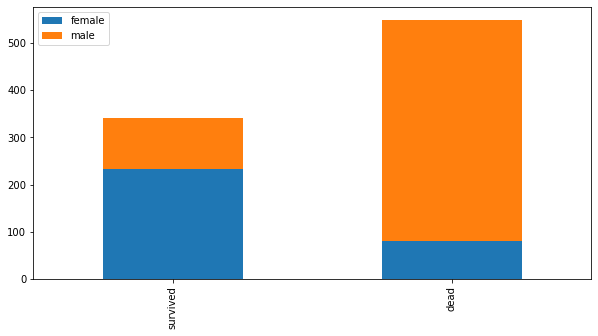

In [21]:
# using barplot to show the relationship between survival and  Sex
print(bar_chart("Sex"))
pivot_table(["Sex"])



Here, it can be see both from the graph-plot and the pivot table that vast majority of people that survived were Female.

Pclass,1,2,3
Survived,,,
0,80,97,372
1,136,87,119


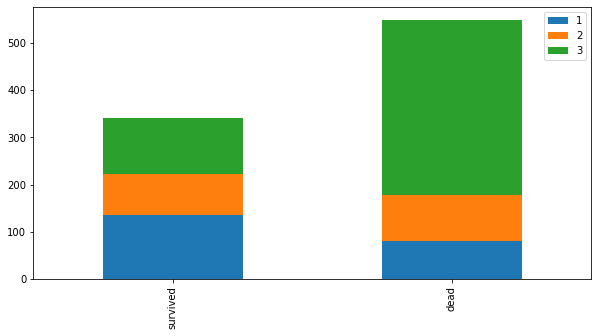

In [22]:
# using barplot to show the relationship between survival Ticket Classes

bar_chart("Pclass")
pivot_table(["Pclass"])

# The above plot show that:
Passengers in 1st class survived more when compare to Passengers in  2nd class. And Passengers in 2nd survived more than Passengers in 3rd class. it can be say that Rich people has high chance of survival

Parch,0,1,2,3,4,5,6
Survived,,,,,,,
0,445.0,53.0,40.0,2.0,4.0,4.0,1.0
1,233.0,65.0,40.0,3.0,NaN,1.0,NaN


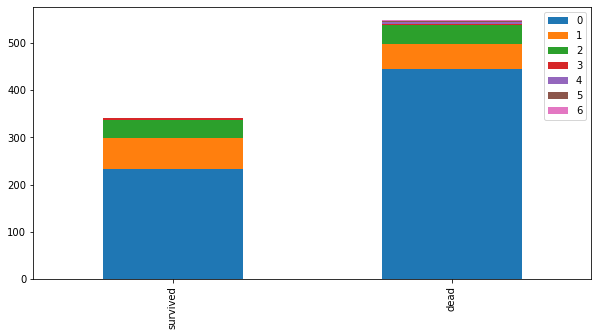

In [23]:
# showing the survival rate of people with or without parent
bar_chart("Parch")
pivot_table(["Parch"])

# The plot above show that:
Passengers with  parent get high chances to survived.

SibSp,0,1,2,3,4,5,8
Survived,,,,,,,
0,398.0,97.0,15.0,12.0,15.0,5.0,7.0
1,210.0,112.0,13.0,4.0,3.0,NaN,NaN


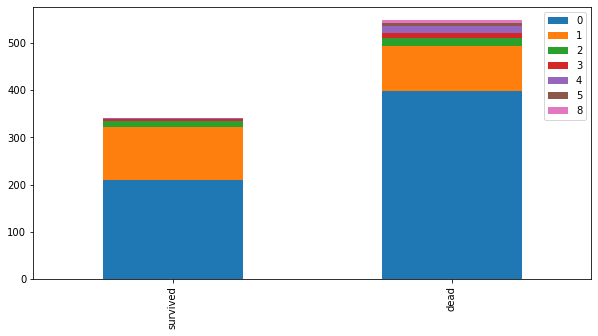

In [24]:
# showing the survival rate of people with or without their relative
bar_chart("SibSp")
pivot_table(["SibSp"])

# The plot above shows that:
Passengers with less relative has better chance of survival

In [25]:
pivot_table([ "Sex", "Pclass"])

Sex      female         male         
Pclass        1   2   3    1   2    3
Survived                             
0             3   6  72   77  91  300
1            91  70  72   45  17   47

# 4. Feature Engineering 

- Feature Engineering the process of using domain knowledge to select and transform the most relevant variable from raw data when creating a predictive model inorder to increase the performance and accuracy of the model

In [26]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv("test.csv")

In [27]:
# pringting the first row of the train_df
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


# 4.1 Name column:

-  Here, we will extract the Title of each from passenger from thier Name, then group them in accordant to thier existence, as it might have significant to our modeling, then we will drop the Name drop to avoid overfitting

In [28]:
# combining the train_df and test_df
data = [train_df, test_df]

In [29]:
for dataset in data:
    # split the Title from the Name
    dataset["Title"] = dataset.Name.apply(lambda x: x.split(",")[1].split(".")[0].strip())
    
# replace titles with a more common title or as Rare
    dataset['Title'] = dataset['Title'].replace(['Lady',"the Countess", 'Countess','Capt', 'Col','Don', 'Dr','Major', 'Rev', 'Sir', 
                                                 'Jonkheer', 'Dona'], 'Rare')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    

Title,Master,Miss,Mr,Mrs,Rare
Survived,,,,,
0,17,55,436,26,15
1,23,130,81,100,8


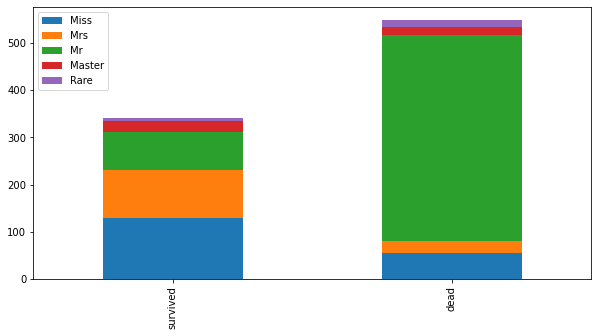

In [30]:
# show the barplot of Title
bar_chart("Title")
pivot_table(["Title"])

# The plot above show that:
- Majority of the passengers bear the title of MR

- Majority of passengers with Title "Mr" didn't survival

- passengers with Title miss tent to survival most.

# Sex column

Here we will encode the column using labelencoder since the we are dealing with ordinal categorical

# Age Columns

- Here we will handle the missing values in the column, then bin the age within a range


In [31]:
train_df.head(6)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,Mr


In [32]:
train_df["Age"].isna().sum()

177

In [33]:
    
mean=train_df.groupby("Title")["Age"].transform("median")
train_df["Age"].fillna(mean, inplace=True)
train_df["Age"].isna().sum()

0

In [34]:
test_df["Age"].isna().sum()

86

In [35]:
mean=test_df.groupby("Title")["Age"].transform("median")
test_df["Age"].fillna(mean, inplace=True)
test_df["Age"].isna().sum()

0

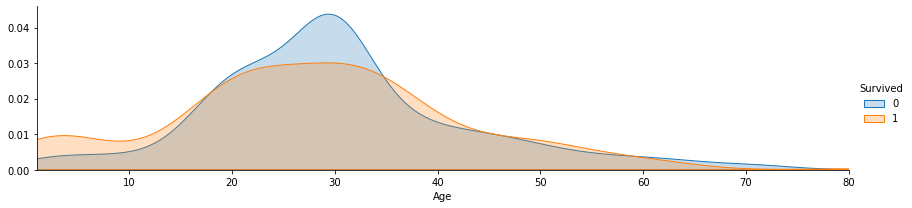

In [36]:
# plot kdeplot of age agaist survived
facet =sns.FacetGrid(train_df,hue="Survived",aspect=4)
facet.map(sns.kdeplot, "Age", shade=True)
facet.set(xlim=(1, train_df["Age"].max()))
facet.add_legend()
plt.show()

(1.0, 15.0)

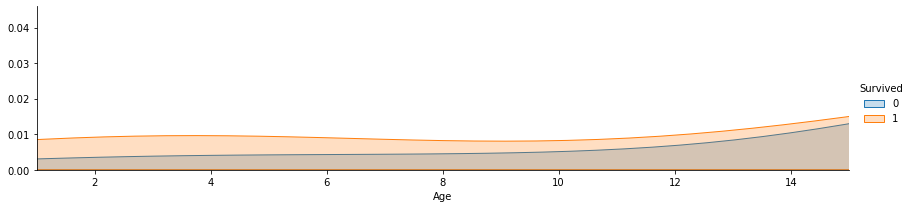

In [37]:
# plot kdeplot of age agaist survived between xlim of 20 and 30

facet =sns.FacetGrid(train_df,hue="Survived",aspect=4)
facet.map(sns.kdeplot, "Age", shade=True)
facet.set(xlim=(0, train_df["Age"].max()))
facet.add_legend()
plt.xlim(1,15)

# The plot above show that
- Passenger whose age limit  fall within the range 1 year  to 14  years to survival  

(15.0, 30.0)

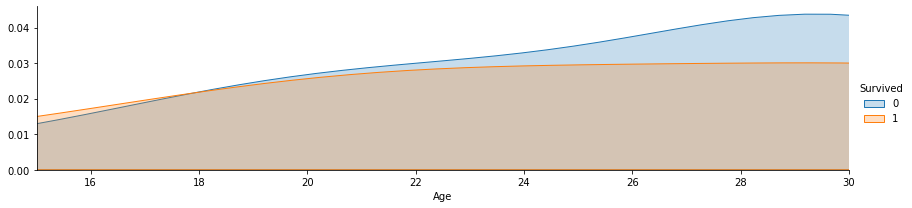

In [38]:
# plot kdeplot of age agaist survived between xlim of 20 and 30

facet =sns.FacetGrid(train_df,hue="Survived",aspect=4)
facet.map(sns.kdeplot, "Age", shade=True)
facet.set(xlim=(0, train_df["Age"].max()))
facet.add_legend()
plt.xlim(15,30)

# The plot above show that:
- Passengers whose age limit  fall within the range 15  to 30 are likely not to survival  

In [39]:
## create bin for age features
for dataset in data:
    dataset['Age_bin'] = pd.cut(dataset['Age'], bins=[0,12,20,40,120], labels=['Children','Teenage','Adult','Elder'])

# Embarked

- Here we will fill the missing values with most frequent, then encode the column using OneHotEncoder

In [40]:
test_df.Embarked.describe()

count     418
unique      3
top         S
freq      270
Name: Embarked, dtype: object

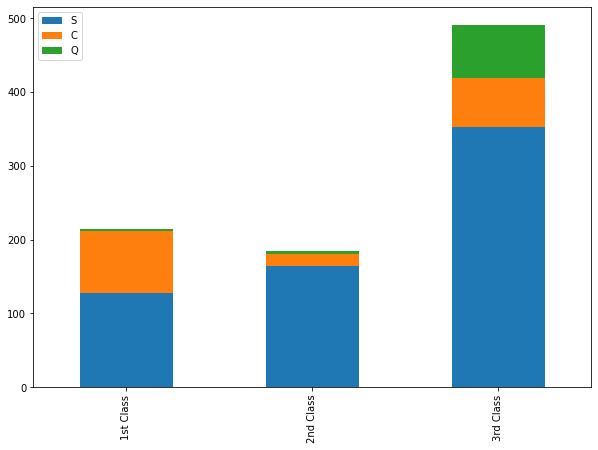

In [41]:
# ploting the barplot of Embarked in respect to the classes on the class 
pclass1 = train_df[train_df["Pclass"]==1]["Embarked"].value_counts()
pclass2 = train_df[train_df["Pclass"]==2]["Embarked"].value_counts()
pclass3 = train_df[train_df["Pclass"]==3]["Embarked"].value_counts()
df1 = pd.DataFrame([pclass1, pclass2, pclass3], index= ["1st Class", "2nd Class", "3rd Class"])
df1.plot(kind="bar", stacked=True, figsize=(10,7))
plt.show()

# The plot above show that:
- Passengers that Embarked from Q has highest rate of survival in all the classes of the ship

In [42]:
# fill the missing values with S
for i in data:
    i["Embarked"] = i["Embarked"].fillna(train_df["Embarked"].mode()[0])

In [43]:
train_df["Embarked"].isna().sum()

0

Embarked,C,Q,S
Survived,,,
0,75,47,427
1,93,30,219


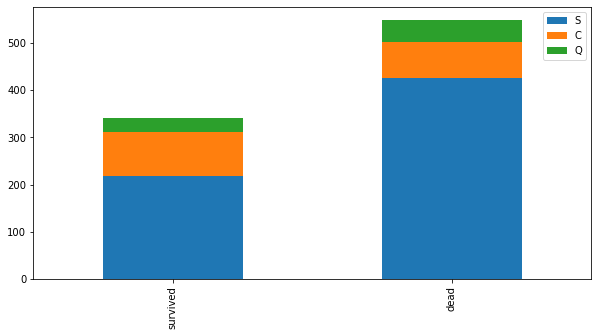

In [44]:
# ploting Embarked 
bar_chart("Embarked")
pivot_table(["Embarked"])

# The plot above show that:
- Passengers that Embarked from Q has highest rate of survival 

In [45]:
test_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Age_bin
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,Mr,Adult
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,Mrs,Elder
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,Mr,Elder
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,Mr,Adult
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,Mrs,Adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,28.5,0,0,A.5. 3236,8.0500,NaN,S,Mr,Adult
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,Rare,Adult
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,Mr,Adult
416,1308,3,"Ware, Mr. Frederick",male,28.5,0,0,359309,8.0500,NaN,S,Mr,Adult


# Fare

- Here we will fill the missing data by grouping the classes and find the meadian fare of each class

In [46]:
# handling the missing data
train_df["Fare"].fillna(train_df.groupby("Pclass")["Fare"].transform("median"), inplace=True)
test_df["Fare"].fillna(test_df.groupby("Pclass")["Fare"].transform("median"), inplace=True)

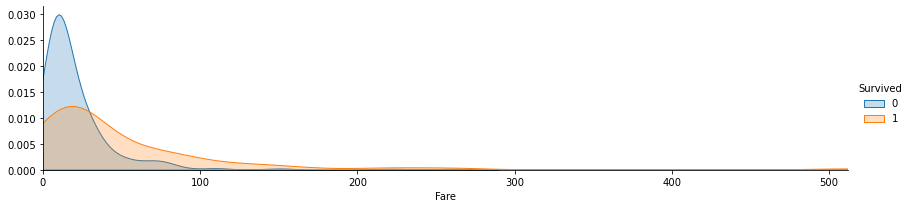

In [47]:
facet =sns.FacetGrid(train_df,hue="Survived",aspect=4)
facet.map(sns.kdeplot, "Fare", shade=True)
facet.set(xlim=(0, train_df["Fare"].max()))
facet.add_legend()
plt.show()

In [48]:
for dataset in data:
    dataset['Fare_bin'] = pd.cut(dataset['Fare'], bins=[0,7.91,14.45,31,120], labels=['Low_fare','median_fare',
                                                                                      'Average_fare','high_fare'])

# The plot above show that:
- The passenger with higher fare survival more when compare to passenger with lower fare

# Cabin
- Here I will extract the letter from the from the number, as the letter indicate the type of the cabin the in ship. I will then encode the column using OneHotEncoder

In [49]:
train_df.Cabin.isna().sum()

687

In [52]:
# seperating the letter from number in Cabin column
data= [train_df, test_df]
for dataset in data:
    dataset["Cabin"]= train_df.Cabin.apply(lambda x: str(x)[0])

In [53]:
dataset["Cabin"].value_counts()

n    326
C     32
B     16
D     14
E     11
F      8
A      6
G      4
T      1
Name: Cabin, dtype: int64

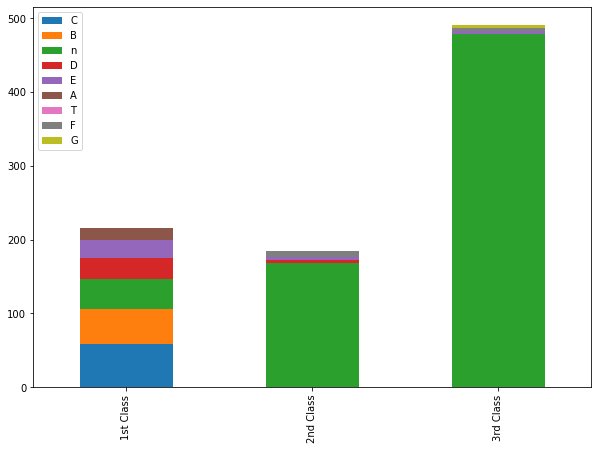

In [54]:
pclass1 = train_df[train_df["Pclass"]==1]["Cabin"].value_counts()
pclass2 = train_df[train_df["Pclass"]==2]["Cabin"].value_counts()
pclass3 = train_df[train_df["Pclass"]==3]["Cabin"].value_counts()
df1 = pd.DataFrame([pclass1, pclass2, pclass3], index= ["1st Class", "2nd Class", "3rd Class"])
df1.plot(kind="bar", stacked=True, figsize=(10,7))
plt.show()

In [55]:
train_df["Cabin"].isna().sum()

0

In [56]:
# filling the missing data in Cabin Column with mode 
train_df["Cabin"].fillna(train_df.groupby("Pclass")["Cabin"].agg(pd.Series.mode), inplace=True)
test_df["Cabin"].fillna(test_df.groupby("Pclass")["Cabin"].agg(pd.Series.mode), inplace=True)

# Family Size

Here, i will combine thr SibSp and Parch as Family

In [58]:
train_df["familt_size"] = train_df["SibSp"] + train_df["Parch"] + 1
test_df["familt_size"] = train_df["SibSp"] + train_df["Parch"] + 1

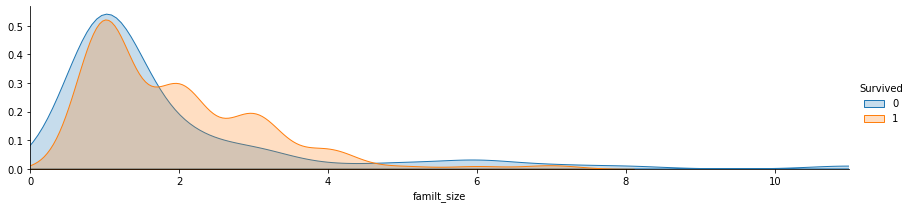

In [59]:
# visualizing the rate of survival of passenger with of without family
facet =sns.FacetGrid(train_df,hue="Survived",aspect=4)
facet.map(sns.kdeplot, "familt_size", shade=True)
facet.set(xlim=(0, train_df["familt_size"].max()))
facet.add_legend()
plt.show()

# The plot above indicate that:

- The Passengers with families has a better chance to survival

# Feature Selection

- Feature selection is the process of selecting features with good significant to machine learning model and dropping uncessary features to enhance the performace of the model

In [60]:
# dropping uncessary columns from the dataset
train_df2=train_df.copy()
test_df2=test_df.copy()
data2 = [train_df2, test_df2]
for dataset in data2:
    dataset.drop(['Name',"PassengerId", "Ticket", "Age","Fare"], axis=1, inplace=True)

# Feature Encoder

- feature encoder is the process of transforming all the categories Features into numeric. inorder to be use in building machine learning model

In [62]:
# transform category features in the dataset to numeric
train_df2 = pd.get_dummies(train_df2, columns = ["Sex","Title","Age_bin","Embarked","Fare_bin", "Cabin"],
                             prefix=["Sex","Title","Age_type","Em_type","Fare_type", "Cabin"], drop_first=True)
test_df2 = pd.get_dummies(test_df2, columns = ["Sex","Title","Age_bin","Embarked","Fare_bin", "Cabin"],
                             prefix=["Sex","Title","Age_type","Em_type","Fare_type", "Cabin"], drop_first=True)

In [63]:
# Extracting the Features
X = train_df2.copy()
y =X.pop("Survived")

In [64]:
# show the mutual_info of the feature
from sklearn.feature_selection import mutual_info_classif

mi_score = mutual_info_classif(X,y)
mi_score = pd.Series(mi_score, index=X.columns)
mi_score

Pclass                    0.063795
SibSp                     0.000342
Parch                     0.000000
familt_size               0.049467
Sex_male                  0.151996
Title_Miss                0.064704
Title_Mr                  0.154762
Title_Mrs                 0.028332
Title_Rare                0.002014
Age_type_Teenage          0.000000
Age_type_Adult            0.020734
Age_type_Elder            0.000000
Em_type_Q                 0.000347
Em_type_S                 0.019012
Fare_type_median_fare     0.007773
Fare_type_Average_fare    0.000000
Fare_type_high_fare       0.002922
Cabin_B                   0.034678
Cabin_C                   0.000000
Cabin_D                   0.010798
Cabin_E                   0.000000
Cabin_F                   0.000000
Cabin_G                   0.000000
Cabin_T                   0.000000
Cabin_n                   0.056536
dtype: float64

<AxesSubplot:>

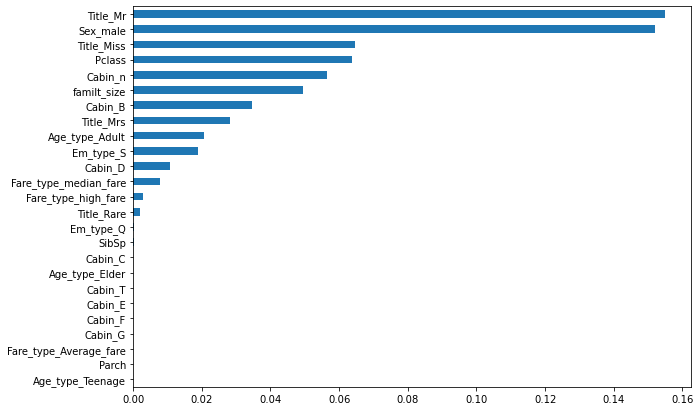

In [69]:
#plot the mutual score of the feature
plt.figure(figsize=(10,7))
mi_score = mi_score.sort_values()
mi_score.plot(kind="barh")

In [70]:
# split the data into tran and test
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=.02, random_state=42)

In [71]:
# shape of the splited data
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((873, 25), (18, 25), (873,), (18,))

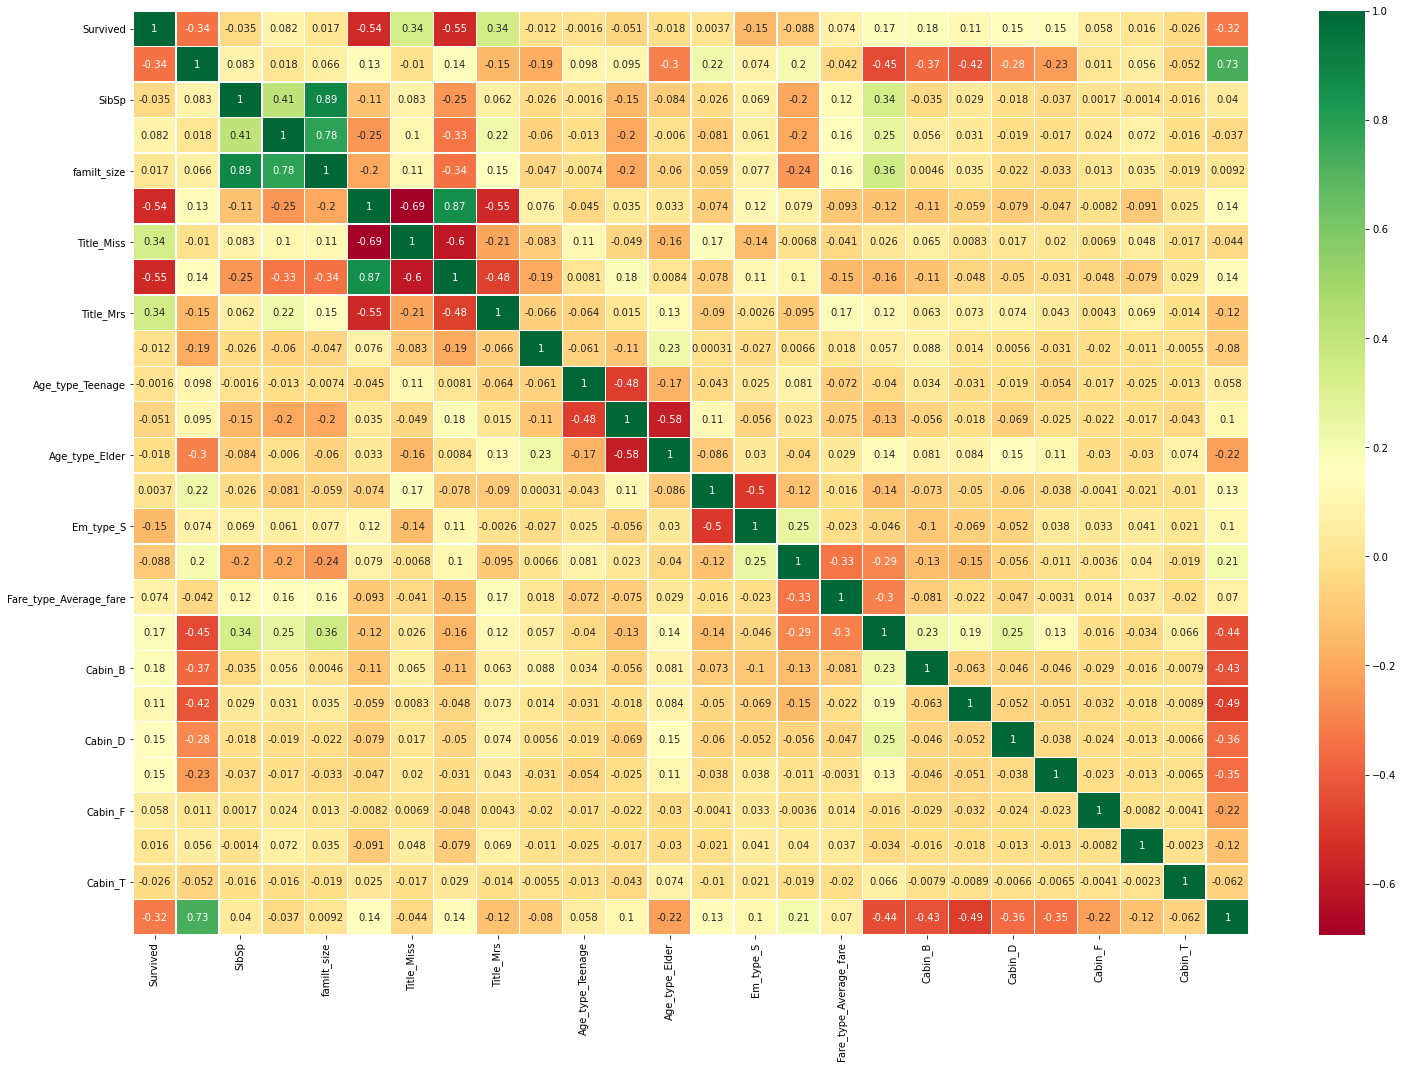

In [72]:
sns.heatmap(train_df2.corr(),annot=True,cmap='RdYlGn',linewidths=0.4) #data.corr()-->correlation matrix
fig=plt.gcf()
fig.set_size_inches(25,17)
plt.show()

# Model Building

# using lazypredict to predict the best algorithm for our model

In [75]:
### importing LazyClassifier for classification problem because here we are solving Classification use case.
from lazypredict.Supervised import LazyClassifier

### spliting dataset into training and testing part
from sklearn.model_selection import train_test_split


In [76]:
clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric = None)

### fitting data in LazyClassifier
models,predictions = clf.fit(x_train, x_test, y_train, y_test)
### lets check which model did better on Breast Cancer Dataset



100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 14.50it/s]


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:02<00:00, 13.68it/s]


In [78]:
models

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
AdaBoostClassifier,0.94,0.95,0.95,0.94,0.13
LabelSpreading,0.94,0.95,0.95,0.94,0.08
XGBClassifier,0.94,0.95,0.95,0.94,0.18
SVC,0.94,0.95,0.95,0.94,0.05
RidgeClassifierCV,0.94,0.95,0.95,0.94,0.03
RidgeClassifier,0.94,0.95,0.95,0.94,0.03
RandomForestClassifier,0.94,0.95,0.95,0.94,0.31
NuSVC,0.94,0.95,0.95,0.94,0.06
LogisticRegression,0.94,0.95,0.95,0.94,0.06


--------------The Accuracy of the model----------------------------
The accuracy of the Support Vector Machines Classifier is 94.44
The cross validated score for Support Vector Machines Classifier is: 83.05


Text(0.5, 1.05, 'Confusion_matrix')

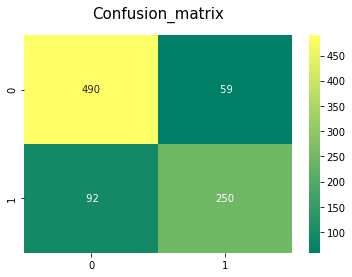

In [79]:
# Support Vector Machines
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import KFold, cross_val_score, cross_val_predict, GridSearchCV
model = SVC()
model.fit(x_train,y_train)
prediction_svm=model.predict(x_test)
print('--------------The Accuracy of the model----------------------------')
print('The accuracy of the Support Vector Machines Classifier is',round(accuracy_score(prediction_svm,y_test)*100,2))
kfold = KFold(n_splits=10, random_state=22) # k=10, split the data into 10 equal parts
result_svm=cross_val_score(model,X,y,cv=kfold,scoring='accuracy')
print('The cross validated score for Support Vector Machines Classifier is:',round(result_svm.mean()*100,2))
y_pred = cross_val_predict(model,X,y,cv=kfold)
sns.heatmap(confusion_matrix(y,y_pred),annot=True,fmt='3.0f',cmap="summer")
plt.title('Confusion_matrix', y=1.05, size=15)

# SVC seem to be the best. I will fit the model with SVC

# GridSearchCV

- i will use gridsearchcv to tunne the best parameter for svc

In [69]:
model= SVC()
param_grid = {'kernel': ['rbf','linear'], 
                  'gamma': [ 0.001, 0.01, 0.1, 1],
                  'C': [1, 10, 50, 100,200,300, 1000]}
modelsvm = GridSearchCV(model,param_grid = param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

modelsvm.fit(x_train, y_train)

print(modelsvm.best_estimator_)

# Best score
print(modelsvm.best_score_)

Fitting 10 folds for each of 56 candidates, totalling 560 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  48 tasks      | elapsed:    4.1s
[Parallel(n_jobs=4)]: Done 344 tasks      | elapsed:   28.3s


SVC(C=10, gamma=0.01)
0.8327455590386625


[Parallel(n_jobs=4)]: Done 560 out of 560 | elapsed:  2.7min finished


In [81]:
# fitting the model
svc = SVC(C=10, gamma=0.01)
my_model = svc.fit(x_train, y_train)

In [82]:
preds= my_model.predict(test_df2)

In [83]:
# submission
submission = pd.DataFrame({"PassengerId":test_df["PassengerId"], "Survived":preds})

In [84]:
submission = submission.to_csv("submission.csv", index=False)

In [85]:
pd.read_csv("submission.csv")

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,0
415,1307,0
416,1308,0


# THE End